In [1]:
import pandas as pd
import numpy as np
import build as bd
import random

In [41]:
data1 = bd.load_data("output.csv", reduce = False, filterz = True)

In [42]:
data = data1.copy()

# Function definitions

In [43]:
def recommend(song_list: list, df: pd.core.frame.DataFrame, k: int, distance_matrix = None, alfas = [1,1,1,1,1]):
    #print(song_list)
    playlist, indexes = bd.format_input(song_list, df)
    print("input formatted")
    if isinstance(distance_matrix, type(None)):
        distances, total_d = bd.compute_distance_to_playlist(playlist, indexes, df, alfas)
    else:
        print("computing distances to playlist...")
        distances, total_d = bd.select_distance_to_playlist(playlist, indexes, distance_matrix)    
    print("distances computed")
    #display(pd.DataFrame(distances))
    output_df = bd.get_k_recommendations(total_d, k, df)
    print("received recommendations")
    display(output_df)
    return distances, total_d, output_df

In [136]:
def get_distances(song_list: list, df: pd.core.frame.DataFrame, alfas = [1,1,1,1,1]):
    
    playlist, indexes = bd.newformat(song_list, df) #playlist is a list of song objects, indexes are their indices in the dataframe
    print('input formatted')
    df_filtered = df.copy()
    for i in indexes:
        df_filtered.drop(i, inplace=True)

    totals = []
    songs = []
    for index, song in df_filtered.iterrows():
        distances = [bd.distance(song, play, alphas) for play in playlist]
        tot_d = sum(distances)
        totals.append(tot_d)
        songs.append(song)
    return totals, songs, playlist

def get_recommendations(totals, songs, k):
    indices = np.argsort(totals)[:k]
    result = [songs[i] for i in indices]
    distances = [totals[i] for i in indices]
    return result, distances

# Songs I know

In [140]:
mylist = ['Backstreet Boys', 'Foo Fighters', 'Nine Inch Nails', 'Nightwish', 'Panic At The Disco', 'Christina Aguilera', 'Shakira',
          'The Police', 'Metallica', 'Radiohead', 'Dolly Parton', 'Led Zeppelin', 'Kelly Clarkson', 'John Legend', 'Red Hot Chili Peppers',
          'Michael Jackson', 'Jennifer Lopez', 'Britney Spears', 'Rihanna', 'U2', 'David Bowie', 'Beyoncé', 'The White Stripes', 'The Cardigans', 'Oasis',
          'Fall Out Boy', 'Slipknot', 'Bon Jovi', 'Black Eyed Peas', 'Ben E. King', 'The Beatles', 'Nickelback', 'Andy Griffith', 'Mariah Carey',
          'Janet Jackson', 'Madonna', 'Cher', 'Céline Dion', 'Coldplay', 'Alicia Keys', 'My Chemical Romance', 'John Mayer', 'Slipknot', 'Rick Astley',
          'Pink Floyd', 'Aerosmith', 'Nickelback featuring Kid Rock', 'Fergie', 'Nirvana', 'Chris Brown', 'Maroon 5', 'Bruce Springstreen',
          'Amy Winehouse', 'Bon Jovi', 'Jessica Simpson' 'Kaija Koo', 'Jackie WIlson', 'Indica', 'Hanoi Rocks', 'Yölintu',
          'Justin Timberlake', 'Owl City', 'Evanescence', 'Gorillaz', 'Electric Light Orchestra', 'Republica', 
          'The Rascals', 'Led Zeppelin', 'The Cardigans', 'Janet Jackson']
result = []
for artist in mylist:
    f = data[data['artist_name'] == artist][['artist_name', 'title', 'release']]
    result.extend(f.values.tolist())
display(pd.DataFrame(result))
# Print the resulting list of lists
#for item in result:
#    print(item)


,0,1,2
0,Backstreet Boys,Larger Than Life,Just Want You To Know
1,Backstreet Boys,PDA,This Is Us
2,Backstreet Boys,The Call,Black & Blue
3,Backstreet Boys,Shape Of My Heart,Black & Blue
4,Foo Fighters,Hell,In Your Honor
...,...,...,...
323,Janet Jackson,Hold On Baby,Janet
324,Janet Jackson,When I Think Of You,Control
325,Janet Jackson,Again,Janet
326,Janet Jackson,Greatest X,Discipline


# Defining input playlist

In [167]:
#playlist = ['She Will Be Loved','What Goes Around...Comes Around', 'Never Gonna Give You Up']
# = ['Overdrive', 'Next Year', 'King Of Pain', 'We Gotta Talk', 'New York', 'I Love This Town', 'Karma', "Something's Missing"]

#playlist = ['Columbia', 'Thriller', "America's Suitehearts", 'Harder To Breathe', 'Through With You']
#playlist = ['Africa', 'After Hours', 'Hold On', 'Paradise', 'Poker Face', 'Roses', 'Umbrella']
#playlist= ['London Bridge', 'Valerie', 'Single Ladies (Put A Ring On It)','Oops!...I Did It Again']
#playlist = ['Plastic People', 'You And Your Heart', '4 In The Morning','Sweet Disposition','Just In Case', 'Dancing Shoes',
 #           'Knocked Up', 'Macarena','November Has Come','Ragoo', 'Descontrol', 'Dutty Wine']
#playlist= ['We Gotta Talk','Everytime', 'SOS','Krazy In Luv', 'Dangerously In Love Medley', 'Touch My Body',
#'Vogue [Live]', "Papa Don't Preach",'Velvet']
#playlist = ['1000 Good Intentions', 'Amber Changing', 'Bath Of Least Resistance', 'Drones', 'Everchanging', "I Don't Wanna be a War Hero",
#            'State Of The Union', 'My Heart Is Yearn
#playlist = ['Donde Estas Corazon', 'Harder To Breathe', 'Larger Than Life', 'Loba', 'Oops!...I Did It Again', 'Through With You',
 #           'She Will Be Loved']
playlist = ['Shut Your Eyes', 'You Found Me', 'Do You Want To', 'No You Girls', 'Sweet Disposition', 'Between Love & Hate']

This playlist is part of an actual playlist imported in the spotify_playlist_import file

In [168]:
data_reset = data.reset_index()
d = data.copy()
result = []
for song in playlist:
    f = data_reset[d['title'] == song]
    result.extend(f.values.tolist())
# Print the resulting list of lists
songs = pd.DataFrame(result)
pl_indices = songs[0].tolist()
print(pl_indices)


[1127, 6884, 6993, 6953, 6701, 5220, 4661]


In [169]:
display(pd.DataFrame([data.iloc[i] for i in pl_indices])[['artist_name', 'title', 'artist_terms']])

,artist_name,title,artist_terms
1127,Snow Patrol,Shut Your Eyes,"[indie rock, rock, pop, alternative]"
6884,The Fray,You Found Me,"[piano rock, alternative rock, classic rock, r..."
6993,MxPx,You Found Me,"[christian rock, pop punk, christian punk]"
6953,Franz Ferdinand,Do You Want To,"[art rock, indie rock]"
6701,Franz Ferdinand,No You Girls,"[art rock, indie rock]"
5220,The Temper Trap,Sweet Disposition,"[alternative rock, indie rock, melbourne]"
4661,The Strokes,Between Love & Hate,"[indie rock, rock, new york, garage rock reviv..."


# Recommending

In [178]:
alphas = [1,1,1,2,2]

In [179]:
playlist_input = [[str(data.iloc[i]['title']), str(data.iloc[i]['artist_name']),str(data.iloc[i]['release'])] for i in pl_indices]

totals, songs, playlist = get_distances(playlist_input, data, alphas)
recommendations, rec_distances = get_recommendations(totals, songs, 20)


output_df = pd.DataFrame(recommendations)
extra = output_df.copy()
extra['total distance'] = rec_distances
print('done')

input formatted
done


In [180]:
out_indices = output_df.index.tolist()
print('input playlist: ',pl_indices)
print('output playlist: ',out_indices)
display(extra[['artist_name', 'title', 'artist_terms','total distance']])

input playlist:  [1127, 6884, 6993, 6953, 6701, 5220, 4661]
output playlist:  [572, 771, 3121, 1415, 3805, 828, 370, 3378, 5208, 4801, 1322, 6850, 5092, 7075, 8376, 4757, 5239, 9070, 9385, 7116]


,artist_name,title,artist_terms,total distance
572,Franz Ferdinand,Eleanor Put Your Boots On,"[art rock, indie rock]",17.436134
771,Snow Patrol,Chocolate,"[indie rock, rock, pop, alternative]",19.424639
3121,Snow Patrol,Just Say Yes,"[indie rock, rock, pop, alternative]",19.505587
1415,Snow Patrol,Chasing Cars,"[indie rock, rock, pop, alternative]",19.569704
3805,Snow Patrol,Wow,"[indie rock, rock, pop, alternative]",19.673457
828,Snow Patrol,Half The Fun,"[indie rock, rock, pop, alternative]",19.742889
370,SNOWPATROL,We Wish You A Merry Christmas,"[indie rock, rock, pop, alternative]",19.892144
3378,Snow Patrol,Just Say Yes,"[indie rock, rock, pop, alternative]",19.942263
5208,Snow Patrol,In My Arms,"[indie rock, rock, pop, alternative]",20.052564
4801,Snow Patrol,New Sensation,"[indie rock, rock, pop, alternative]",20.248461


# Visualize distances

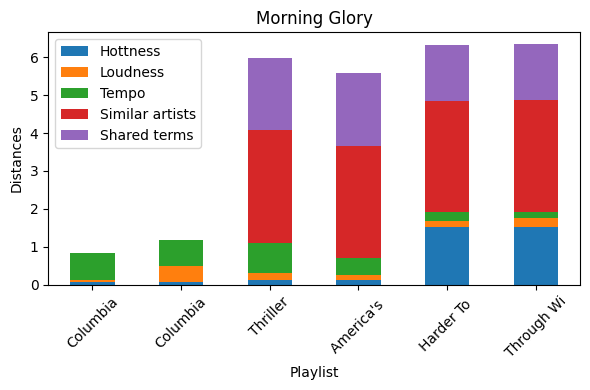

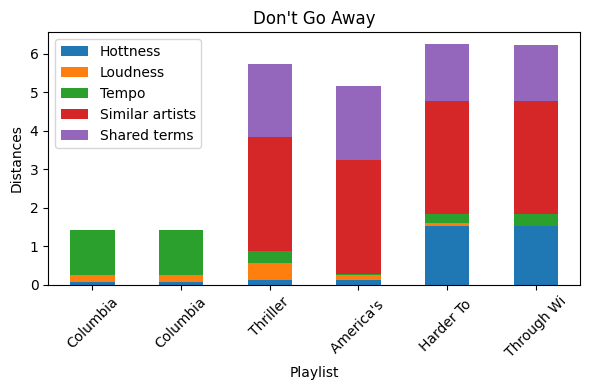

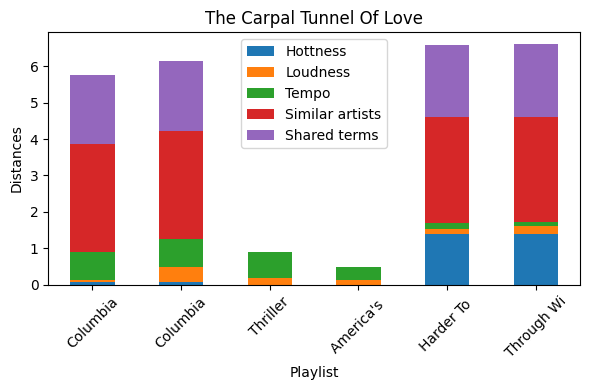

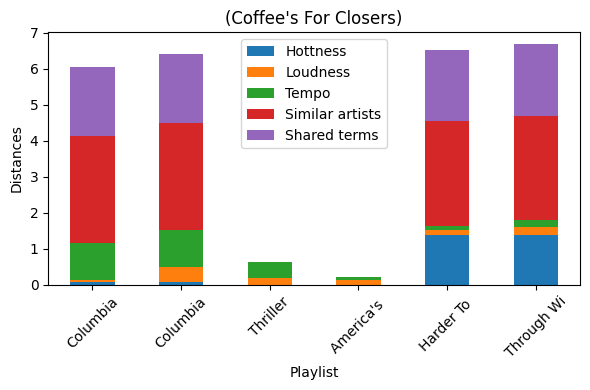

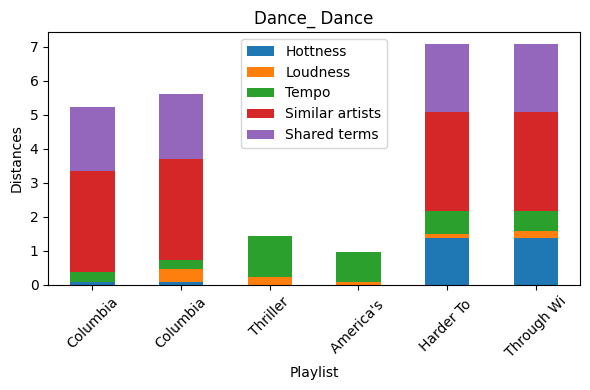

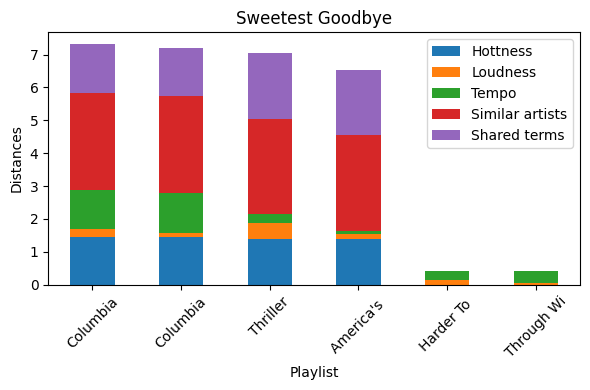

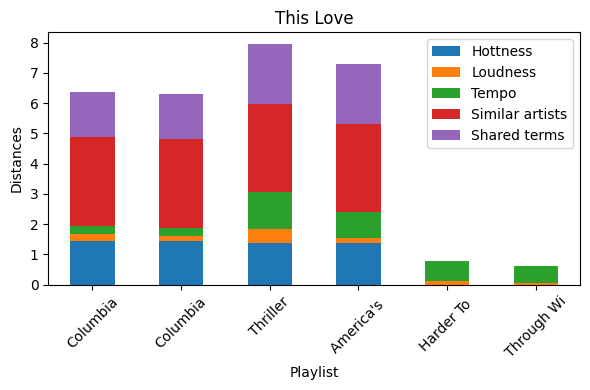

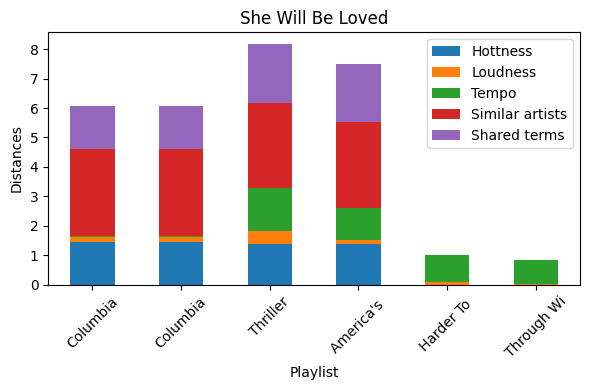

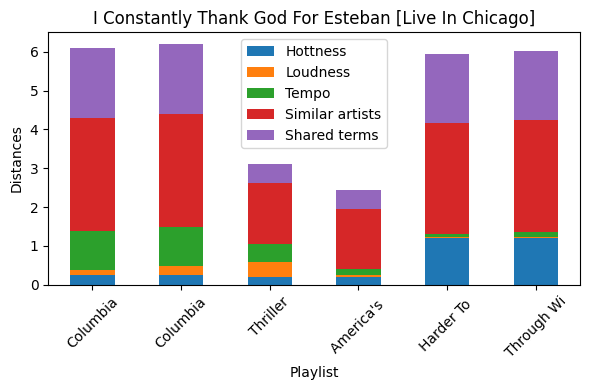

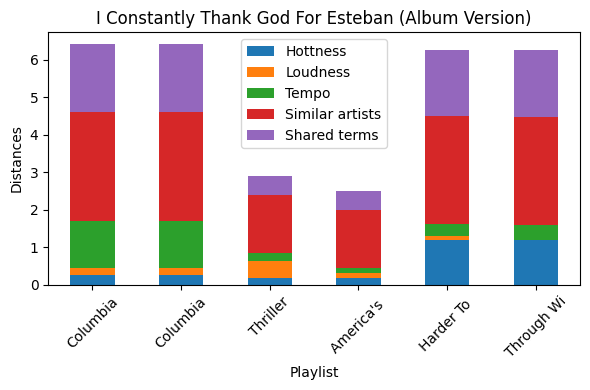

In [90]:
import random
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import axes3d

def bar_graph_data(songrec, pl, alphas = [1,1,1,1,1]):
    hottness = []
    for song in pl:
        #print('testing song: ', song)
        hottness.append(bd.distance(songrec, song, alphas, feature ='hottness'))
        #print('this one worked')
    loudness = [bd.distance(songrec, song, alphas, feature='loudness') for song in pl]
    tempo = [bd.distance(songrec, song, alphas, feature='tempo') for song in pl]
    similar_artists = [bd.distance(songrec, song, alphas, feature='similar') for song in pl]
    shared_terms = [bd.distance(songrec, song, alphas, feature='terms') for song in pl]

    return hottness, loudness, tempo, similar_artists, shared_terms



for index, songrec in output_df.iterrows():
    
    #print(songrec)
    hottness, loudness, tempo, similar_artists, shared_terms = bar_graph_data(songrec, playlist, alphas)
    names = [song['title'] for song in playlist]
    
    plotdata = {
        'Playlist songs' : [song['title'][:10] for song in playlist],
        'Hottness' : hottness,
        'Loudness' : loudness,
        'Tempo' : tempo,
        'Similar artists' : similar_artists,
        'Shared terms' : shared_terms  #side bar plot
    }
    df = pd.DataFrame(plotdata)
    df.set_index('Playlist songs', inplace=True)
    fig, ax = plt.subplots(figsize=(6,4))
    bars = df[['Hottness', 'Loudness', 'Tempo', 'Similar artists', 'Shared terms']].plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel('Playlist')
    ax.set_ylabel('Distances')
    ax.set_title(songrec['title'])

    
    ax.set_xticks(np.arange(len(playlist)))
    plt.xticks(rotation=45)
    ax.set_xticklabels(df.index)
    
    ax.legend()
    plt.tight_layout()
    plt.show()
    